In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import neighbors


In [50]:
data = pd.read_csv(r"C:\Users\HP1000\Downloads\Participant-03.csv")
data

,Start,Finish,Steps (count)
0,31/12/2021 23:00,01/01/2022 0:00,0.000000
1,01/01/2022 0:00,01/01/2022 1:00,14.000000
2,01/01/2022 1:00,01/01/2022 2:00,0.000000
3,01/01/2022 2:00,01/01/2022 3:00,0.000000
4,01/01/2022 3:00,01/01/2022 4:00,0.000000
...,...,...,...
6015,08/09/2022 13:00,08/09/2022 14:00,0.000000
6016,08/09/2022 14:00,08/09/2022 15:00,893.959035
6017,08/09/2022 15:00,08/09/2022 16:00,534.040965
6018,08/09/2022 16:00,08/09/2022 17:00,390.020268


In [51]:
data.dropna()

,Start,Finish,Steps (count)
0,31/12/2021 23:00,01/01/2022 0:00,0.000000
1,01/01/2022 0:00,01/01/2022 1:00,14.000000
2,01/01/2022 1:00,01/01/2022 2:00,0.000000
3,01/01/2022 2:00,01/01/2022 3:00,0.000000
4,01/01/2022 3:00,01/01/2022 4:00,0.000000
...,...,...,...
6015,08/09/2022 13:00,08/09/2022 14:00,0.000000
6016,08/09/2022 14:00,08/09/2022 15:00,893.959035
6017,08/09/2022 15:00,08/09/2022 16:00,534.040965
6018,08/09/2022 16:00,08/09/2022 17:00,390.020268


In [52]:
data['Steps (count)'] = data['Steps (count)'].astype(int)

In [16]:
new_data = data.drop(['Finish'],axis = 1)

new_data['Start'] = new_data['Start'].apply(pd.to_datetime) 
week = pd.DataFrame(new_data.resample('w',on = 'Start')['Steps (count)'].sum()).reset_index()
week

,Start,Steps (count)
0,2022-01-02,1655
1,2022-01-09,52902
2,2022-01-16,9209
3,2022-01-23,2571
4,2022-01-30,15574
5,2022-02-06,52452
6,2022-02-13,20247
7,2022-02-20,75338
8,2022-02-27,52133
9,2022-03-06,23206


# Does temperature affect people's willingness to walk?¶

In [53]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(week.drop(columns=['Start']), model = 'additive',period=4)
fig = decomposition.plot()

TypeError: Index(...) must be called with a collection of some kind, 'seasonal' was passed

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

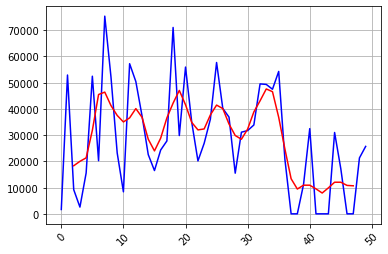

In [18]:
# plot trend on matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
plt.plot(week.index, week['Steps (count)'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')
plt.xticks(rotation=45)

# How does the weekly data reflect the risk of diagnosing diabetes?

In [54]:
ls = []
for value in week['Steps (count)']:
    if value >= 50000:
        ls.append('Low risk')
    else:
        ls.append('High risk')
dic = {'dia':ls}
week['diabetes'] = pd.DataFrame(dic)

In [56]:
week['nth week'] = week.index + 1
week

,Start,Steps (count),Sedentary,diabetes,nth week
0,2022-01-02,1655,1,High risk,1
1,2022-01-09,52902,0,Low risk,2
2,2022-01-16,9209,1,High risk,3
3,2022-01-23,2571,1,High risk,4
4,2022-01-30,15574,1,High risk,5
5,2022-02-06,52452,0,Low risk,6
6,2022-02-13,20247,1,High risk,7
7,2022-02-20,75338,0,Low risk,8
8,2022-02-27,52133,0,Low risk,9
9,2022-03-06,23206,1,High risk,10


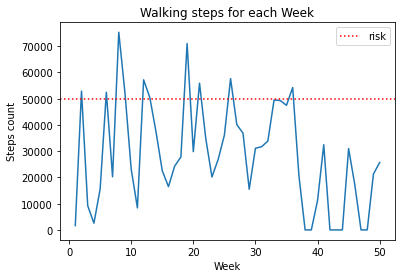

In [57]:
x = week['nth week']
y = week['Steps (count)']

plt.plot(x,y)
plt.axhline(50000,label = 'risk',linestyle = ':',color = 'r')
plt.title('Walking steps for each Week')
plt.xlabel('Week')
plt.ylabel('Steps count')
plt.legend()

plt.show()

# Would rainfall be a factor to affect people's willingness to walk?

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

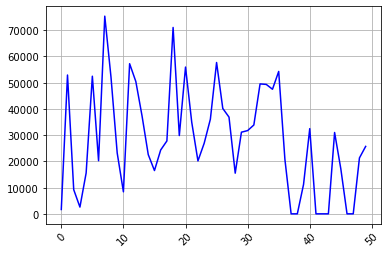

In [48]:
fig, ax = plt.subplots()
ax.grid(True)
plt.plot(week.index, week['Steps (count)'], c='blue')
plt.xticks(rotation=45)

# Does the steps for each week affect by season?

In [58]:
gb_month = week.groupby([week['Start'].dt.isocalendar().week, week['Start'].dt.month]).mean().rename_axis(['week', 'month']).reset_index()
gb_month

,week,month,Steps (count),Sedentary,nth week
0,1,1,52902.0,0.0,2.0
1,2,1,9209.0,1.0,3.0
2,3,1,2571.0,1.0,4.0
3,4,1,15574.0,1.0,5.0
4,5,2,52452.0,0.0,6.0
5,6,2,20247.0,1.0,7.0
6,7,2,75338.0,0.0,8.0
7,8,2,52133.0,0.0,9.0
8,9,3,23206.0,1.0,10.0
9,10,3,8384.0,1.0,11.0


In [46]:
season = gb_month.copy()
season['month'] = season['month'].replace([9,10,11], 'Spring')
season['month'] = season['month'].replace([12,1,2], 'Summer')
season['month'] = season['month'].replace([3,4,5], 'Fall')
season['month'] = season['month'].replace([6,7,8], 'Winter')
season.rename({"Steps (count)":"sum of steps"}, axis = 1, inplace = True)
season.rename({"month":"season"}, axis = 1, inplace = True)


,week,season,sum of steps,Sedentary
0,1,Summer,52902.0,0.0
1,2,Summer,9209.0,1.0
2,3,Summer,2571.0,1.0
3,4,Summer,15574.0,1.0
4,5,Summer,52452.0,0.0


In [60]:
gb_season = season.groupby(['season','week']).mean() #We have grouped the averages of different seasons and weeks
#Let the data of the corresponding season be stored in the corresponding variable name
spring = gb_season.iloc[gb_season.index.get_level_values('season') == 'Spring'].reset_index() 
summer = gb_season.iloc[gb_season.index.get_level_values('season') == 'Summer'].reset_index()
fall = gb_season.iloc[gb_season.index.get_level_values('season') == 'Fall'].reset_index()
winter = gb_season.iloc[gb_season.index.get_level_values('season') == 'Winter'].reset_index()

Text(0.5, 0.98, 'Average Steps during the weeks in Seasons')

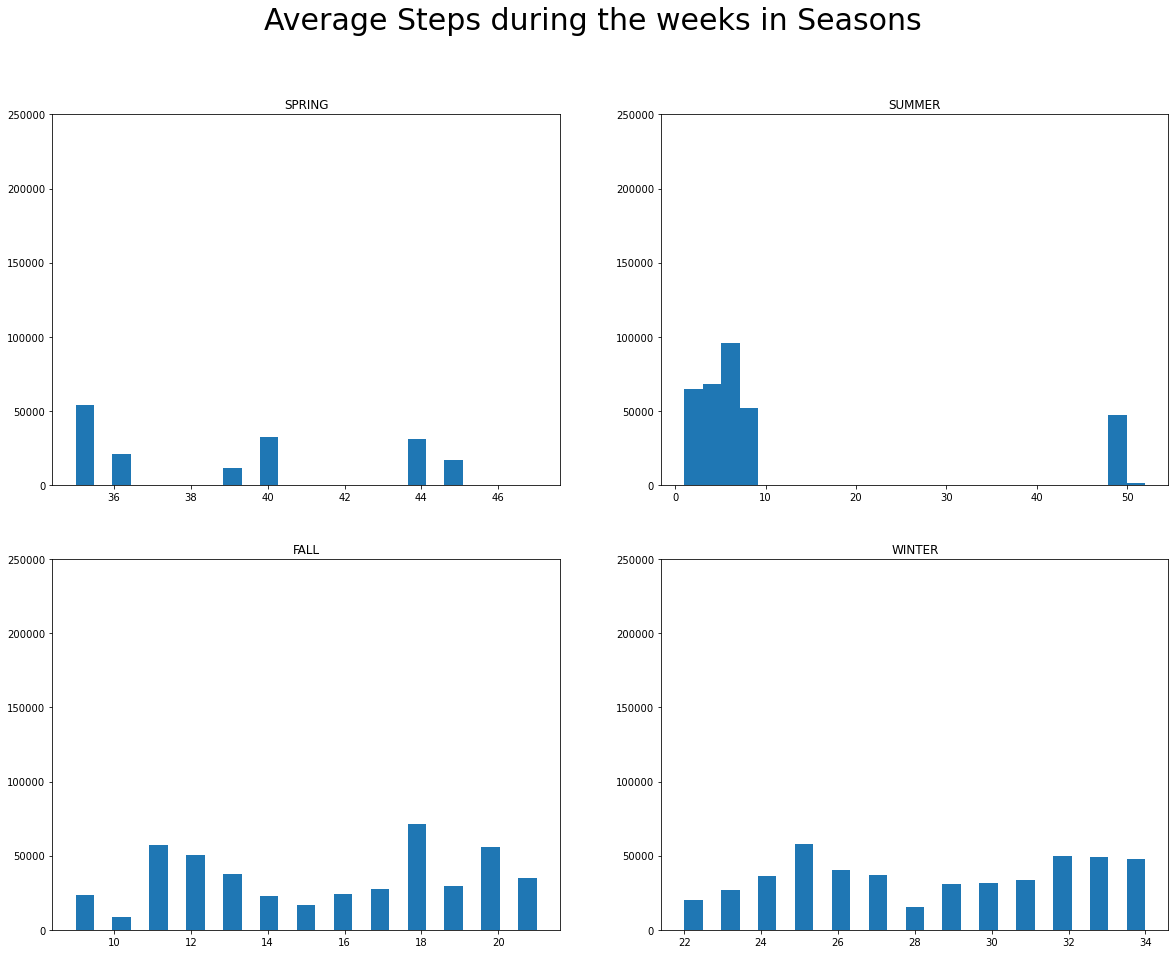

In [61]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15)) #set a 2x2 figure table to show the 4 different seasons

plt.subplot(2,2,1) # to be the first 1 (top left)
plt.hist(x = spring['week'], weights = spring['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('SPRING')

plt.subplot(2,2,2) # to be the first 1 (top right)
plt.hist(x = summer['week'], weights = summer['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('SUMMER')

plt.subplot(2,2,3) # to be the first 1 (bottom left)
plt.hist(x = fall['week'], weights = fall['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('FALL')

plt.subplot(2,2,4) # to be the first 1 (bottom right)
plt.hist(x = winter['week'], weights = winter['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('WINTER')

plt.suptitle('Average Steps during the weeks in Seasons', fontsize=30)

# Are students less active during the exam week?

In [63]:
import matplotlib.dates as mdates
import matplotlib as mpl

(array([18975., 18990., 19005., 19020., 19035., 19050., 19065., 19080.,
        19095., 19110., 19125., 19140., 19155., 19170., 19185., 19200.,
        19215., 19230., 19245., 19260., 19275., 19290., 19305., 19320.,
        19335., 19350., 19365.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

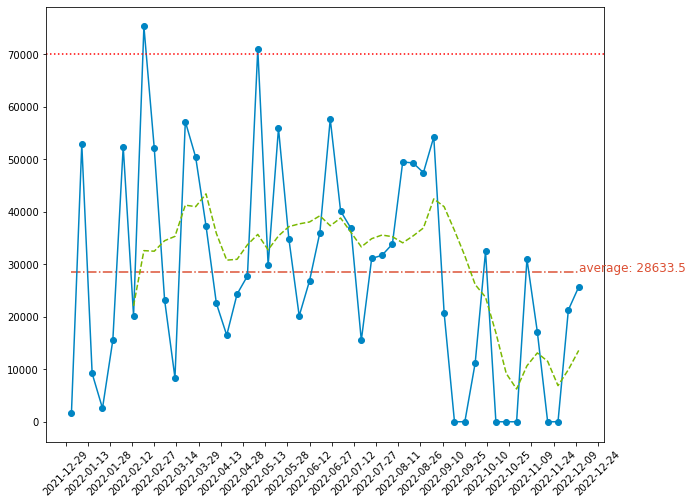

In [64]:
x = week['Start']
y = week['Steps (count)'] # define the variable
color1 = '#0085c3'
color2 = '#7ab800'
color3 = '#dc5034' # define the color
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111) # set the size of the image
ax.plot(x, y, marker='o', color=color1) # draw the plot
plt.axhline(70000,label = 'risk',linestyle = ':',color = 'r')
y2 = y.rolling(7).mean() # calculate week trend
ax.plot(x, y2, ls='--', color=color2, label='week average') # draw trend
ax.hlines(y.mean(), x[0], x[-1:],
          linestyles='-.', colors=color3) # draw average
ax.text(x[-1:], y.mean()-2,
        'average: ' + str(round(y.mean(),1)),
        color=color3, fontsize=12) # indicate average
xlocator = mpl.ticker.MultipleLocator(15)
ax.xaxis.set_major_locator(xlocator)
plt.xticks(rotation=45) # adjust x plot


# How does the weekly data reflect the probability of participant health?

In [69]:
dataji = week.copy()

ValueError: cannot insert Sedentary, already exists

In [70]:
for n in range(0,len(dataji)):
    if dataji['Steps (count)'][n] >= 10000*7:
        dataji['Sedentary'][n] = 0
    else:
        dataji['Sedentary'][n] = 1

C:\Users\HP1000\AppData\Local\Temp/ipykernel_23984/4027815508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataji['Sedentary'][n] = 1
C:\Users\HP1000\AppData\Local\Temp/ipykernel_23984/4027815508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataji['Sedentary'][n] = 0


In [75]:
x = dataji[['nth week', 'Steps (count)']]
y = dataji['Sedentary']


In [76]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.5) # I selected 50% of data for testing. Temporarily set random sampling.

model = LogisticRegression()
model = model.fit(x_train, y_train) # Take x_train and y_train variables into logistic regression function.
model

LogisticRegression()

In [77]:

y_prd = model.predict(x_test)
y_prd[:20] # Get the prediction of sedentary.

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [78]:
a = pd.DataFrame()
a['Predicted'] = list(y_prd)
a['Actual'] = list(y_test)
a.head()

,Predicted,Actual
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [79]:
acc = model.score(x_test, y_test)
acc

0.96

In [80]:

y_prd_acc = model.predict_proba(x_test)
acc_table = pd.DataFrame(y_prd_acc, columns = ['Probability of not sedentary','Probability of sedentary'])
acc_table.head()

,Probability of not sedentary,Probability of sedentary
0,0.296590,0.703410
1,0.003451,0.996549
2,0.000296,0.999704
3,0.000100,0.999900
4,0.004221,0.995779


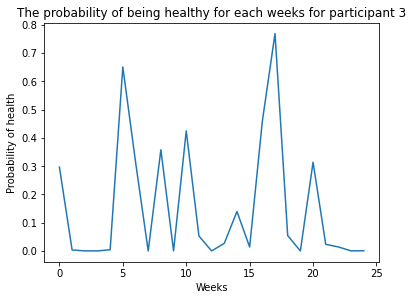

In [81]:
y = acc_table['Probability of not sedentary']
x = [  ]
for n in range(0,len(acc_table)):
  x.append(n)
  n+=1
plt.plot(x,y)
plt.xlabel("Weeks")
plt.ylabel("Probability of health")
plt.title("The probability of being healthy for each weeks for participant 3")
plt.subplots_adjust(bottom=0.05)